#01 INTRO: Árboles de decisión para regresión


# 00 Error Cuadrático Medio
El error medio cuadrático (MSE, por sus siglas en inglés) es una métrica comúnmente utilizada para evaluar el rendimiento de modelos de regresión.
El MSE mide la diferencia promedio al cuadrado entre los valores predichos por un modelo y los valores reales observados. Matemáticamente, se define como:

MSE = (1/n)  *  SUM i=1 hasta n { ( yi – Yi )^2 }


In [ ]:
from sklearn.metrics import mean_squared_error

# vector de valores reales
y_true = [3.0, -0.5, 2.0, 7.0]
# vector de valores predecidos
y_pred = [3.0, -0.5, 2.0, 7.0]

mse = mean_squared_error(y_true, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0


In [ ]:
y_true = [3.0, -0.5, 2.0, 7.0]
y_pred = [2.8, 0.0, 2.1, 7.2]

mse = mean_squared_error(y_true, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.08500000000000005


In [ ]:
y_true = [3.0, -0.5, 2.0, 7.0]
y_pred = [4.5, 3.6, 3.1, 17.8]

mse = mean_squared_error(y_true, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 34.227500000000006


## 0101 ¿Qué es un árbol de decisión de regresión?

Un árbol de regresión es un modelo predictivo utilizado en el aprendizaje automático y la estadística para predecir valores continuos.
A diferencia de los árboles de clasificación, que se utilizan para predecir categorías discretas, los árboles de regresión están diseñados para predecir resultados numéricos.

Casos de uso:
*   Predicción de precios de viviendas.
*   Estimación de ventas.
*   Análisis de riesgos






## 0102 Import
Importamos todas las librerías necesarias para este análisis: pandas, numpy, seaborn, matplotlib.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 0103 Carga el dataset de notas de estudiantes
Para probar a hacer árboles de decisión de Regresión utilizaremos un dataset sobre las notas de ciertos estudiantes portugueses de dos instituos en función de ciertas características socio-demográficas. El dataset original se puede encontrr en Kaggle ([aquí](https://www.kaggle.com/dipam7/student-grade-prediction)).

Podéis encontrar una versión lista para usar con árboles de decisión en github: [https://raw.githubusercontent.com/abelmmg/TheValley_AI/main/notas_estudiantes_limpio.csv](https://raw.githubusercontent.com/abelmmg/TheValley_AI/main/notas_estudiantes_limpio.csv)

Importa este dataset en un dataframe llamado **df**.

In [ ]:
# URL archivo raw
url = "https://raw.githubusercontent.com/abelmmg/TheValley_AI/main/notas_estudiantes_limpio.csv"

# Importa csv
df = pd.read_csv(url)

df.head()

,Nota,Genero,Edad,Entorno Urbano,Familia <=3,Padres Separados,Nivel Edu Madre,Nivel Edu Padre,Tutor No Paterno,Tiempo Casa-Escuela,...,Extraescolares,Acceso Internet,Relación Romántica,Calidad Relación Familiar,Tiempo Estudio,Sale con Amigos,Alcohol Semana,Alcohol Finde,Estado Salud,Ausencias
0,3.0,0,18,1,0,1,4,4,0,2,...,0,0,0,4,3,4,1,1,3,6
1,3.0,0,17,1,0,0,1,1,0,1,...,0,1,0,5,3,3,1,1,3,4
2,5.0,0,15,1,1,0,1,1,0,1,...,0,1,0,4,3,2,2,3,3,10
3,7.5,0,15,1,0,0,4,2,0,1,...,1,1,1,3,2,2,1,1,5,2
4,5.0,0,16,1,0,0,3,3,0,1,...,0,0,0,4,3,2,1,2,5,4


#02 EDA
Realizaremos un pequeño analisis exploratorio para familiarizarnos con el dataset.

In [ ]:
# Echamos un vistazo a las 12 columnas.
df.columns

Index(['Nota', 'Genero', 'Edad', 'Entorno Urbano', 'Familia <=3',
       'Padres Separados', 'Nivel Edu Madre', 'Nivel Edu Padre',
       'Tutor No Paterno', 'Tiempo Casa-Escuela', 'Tiempo Estudio Semanal',
       'Extraescolares', 'Acceso Internet', 'Relación Romántica',
       'Calidad Relación Familiar', 'Tiempo Estudio', 'Sale con Amigos',
       'Alcohol Semana', 'Alcohol Finde', 'Estado Salud', 'Ausencias'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Nota                       395 non-null    float64
 1   Genero                     395 non-null    int64  
 2   Edad                       395 non-null    int64  
 3   Entorno Urbano             395 non-null    int64  
 4   Familia <=3                395 non-null    int64  
 5   Padres Separados           395 non-null    int64  
 6   Nivel Edu Madre            395 non-null    int64  
 7   Nivel Edu Padre            395 non-null    int64  
 8   Tutor No Paterno           395 non-null    int64  
 9   Tiempo Casa-Escuela        395 non-null    int64  
 10  Tiempo Estudio Semanal     395 non-null    int64  
 11  Extraescolares             395 non-null    int64  
 12  Acceso Internet            395 non-null    int64  
 13  Relación Romántica         395 non-null    int64  

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Nota,395.0,5.207595,2.290721,0.0,4.0,5.5,7.0,10.0
Genero,395.0,0.473418,0.499926,0.0,0.0,0.0,1.0,1.0
Edad,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Entorno Urbano,395.0,0.777215,0.416643,0.0,1.0,1.0,1.0,1.0
Familia <=3,395.0,0.288608,0.453690,0.0,0.0,0.0,1.0,1.0
Padres Separados,395.0,0.103797,0.305384,0.0,0.0,0.0,0.0,1.0
Nivel Edu Madre,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Nivel Edu Padre,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
Tutor No Paterno,395.0,0.081013,0.273201,0.0,0.0,0.0,0.0,1.0
Tiempo Casa-Escuela,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0


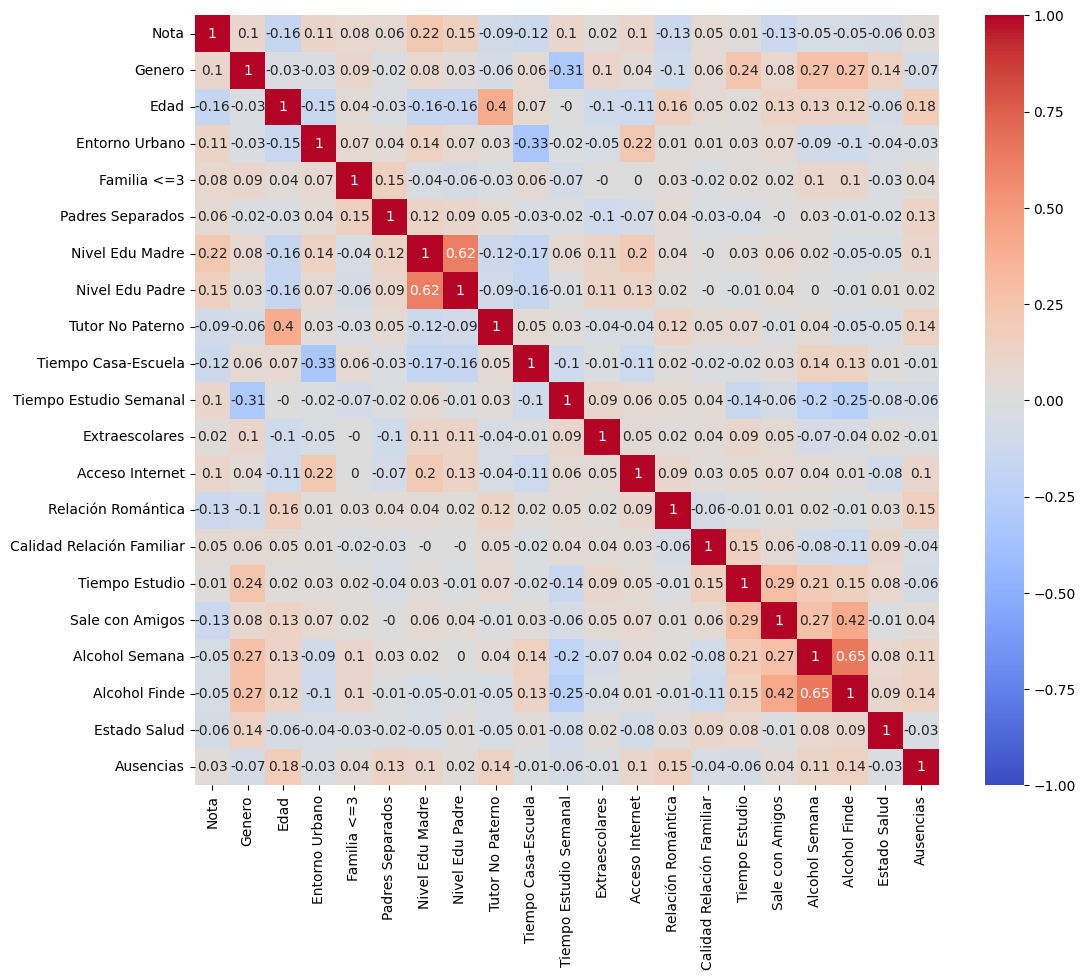

In [ ]:
# Visualización de los coeficientes pearson

plt.figure(figsize=(12, 10))

# Calcular la matriz de correlación
correlation_matrix = df.corr()

sns.heatmap(np.round(correlation_matrix, 2), vmin=-1, vmax=1, annot=True, cmap="coolwarm")
plt.show()

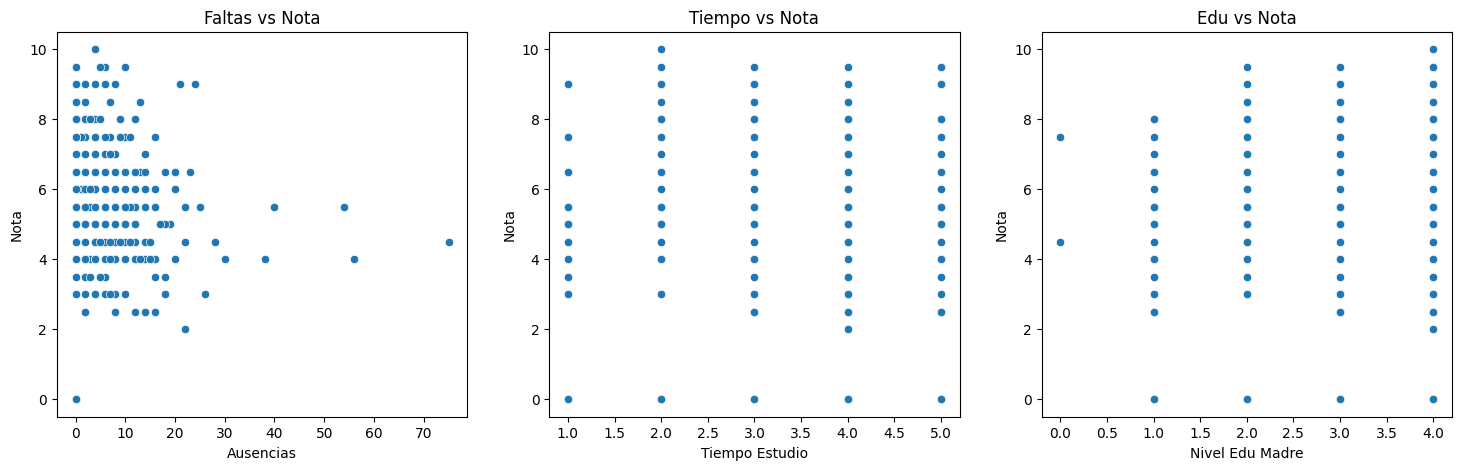

In [ ]:
# Crear gráficos de dispersión
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Gráfico de Faltas vs Nota
sns.scatterplot(ax=axes[0], x='Ausencias', y='Nota', data=df)
axes[0].set_title('Faltas vs Nota')

# Gráfico de Tiempo vs Nota
sns.scatterplot(ax=axes[1], x='Tiempo Estudio', y='Nota', data=df)
axes[1].set_title('Tiempo vs Nota')

# Gráfico de Edu vs Nota
sns.scatterplot(ax=axes[2], x='Nivel Edu Madre', y='Nota', data=df)
axes[2].set_title('Edu vs Nota')

# Mostrar gráficos
plt.show()

In [ ]:
# Visualizar gráficos de dispersion
def scatter_plots(df, y_var, max_cols=5):
    # Filtrar las columnas para excluir la variable dependiente
    independent_vars = [col for col in df.columns if col != y_var]

    # Número total de variables independientes
    total_vars = len(independent_vars)

    # Calcular el número de filas necesarias
    num_rows = (total_vars + max_cols - 1) // max_cols

    # Crear la figura y los ejes
    fig, axes = plt.subplots(num_rows, max_cols, figsize=(5 * max_cols, 5 * num_rows))
    axes = axes.flatten()

    for idx, var in enumerate(independent_vars):
        sns.scatterplot(x=df[var], y=df[y_var], ax=axes[idx])
        axes[idx].set_title(f'{var} vs {y_var}')

    # Eliminar gráficos sobrantes
    for i in range(len(independent_vars), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

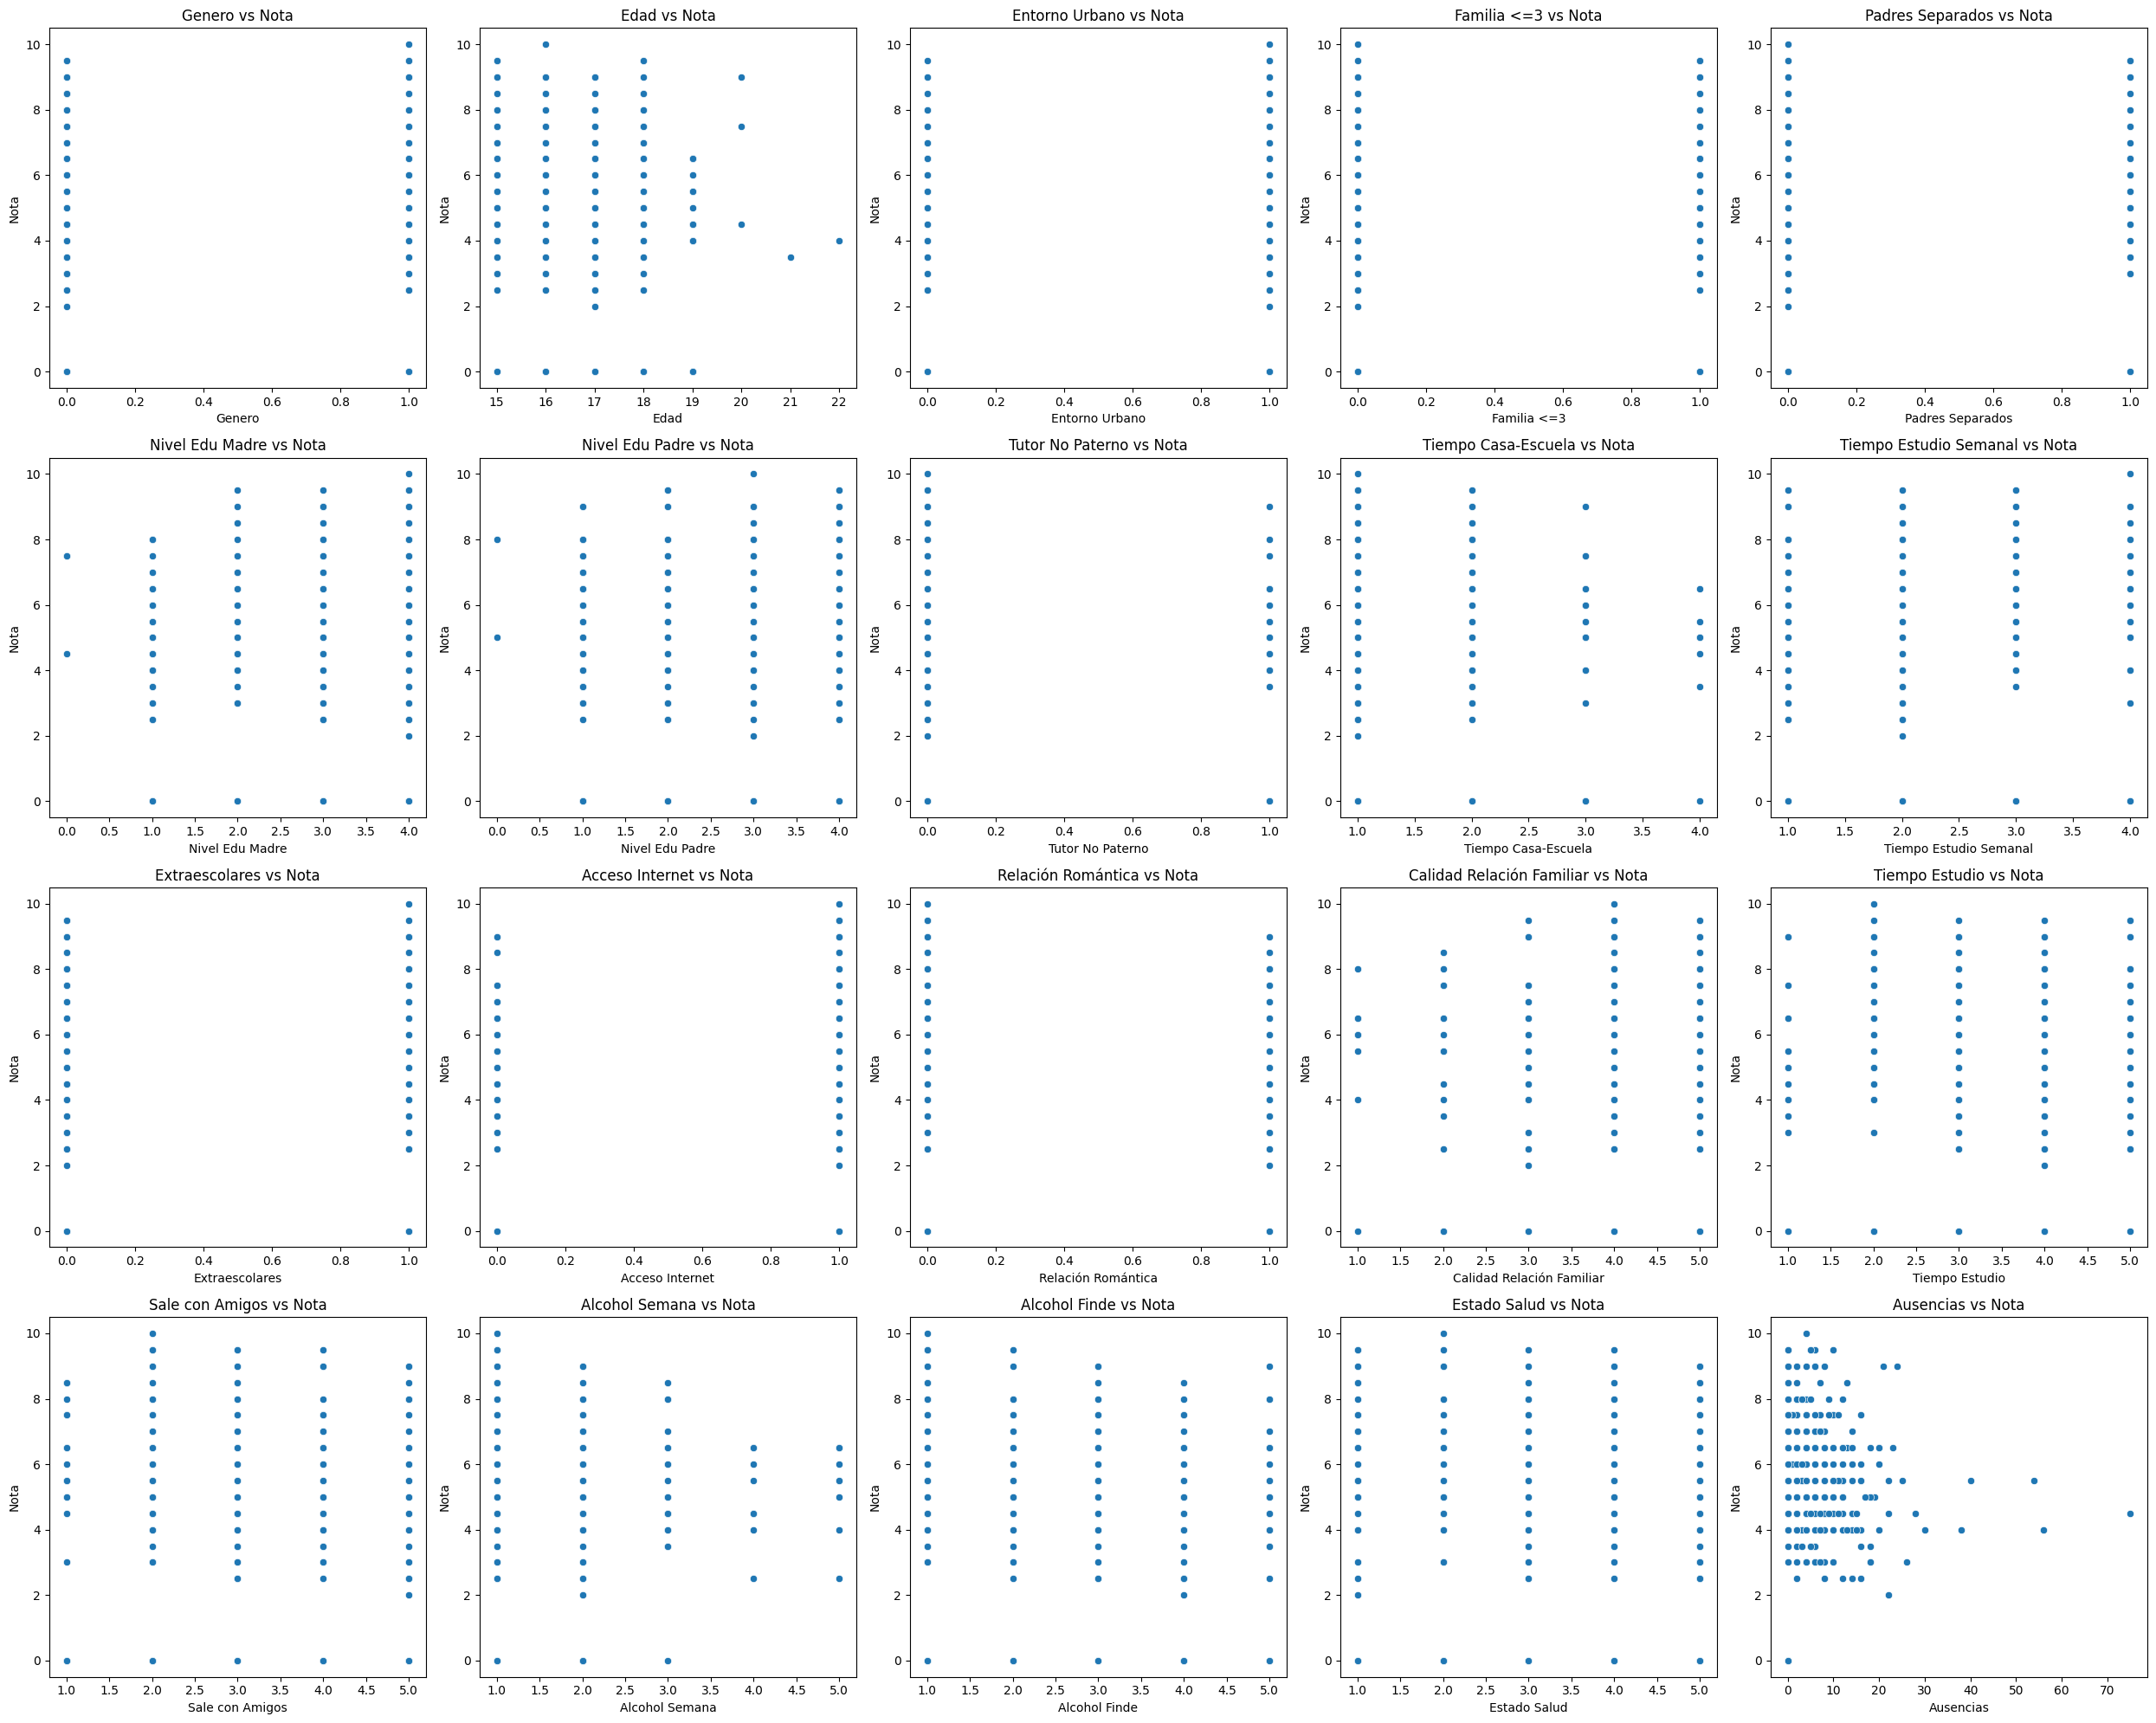

In [ ]:
scatter_plots(df, 'Nota')

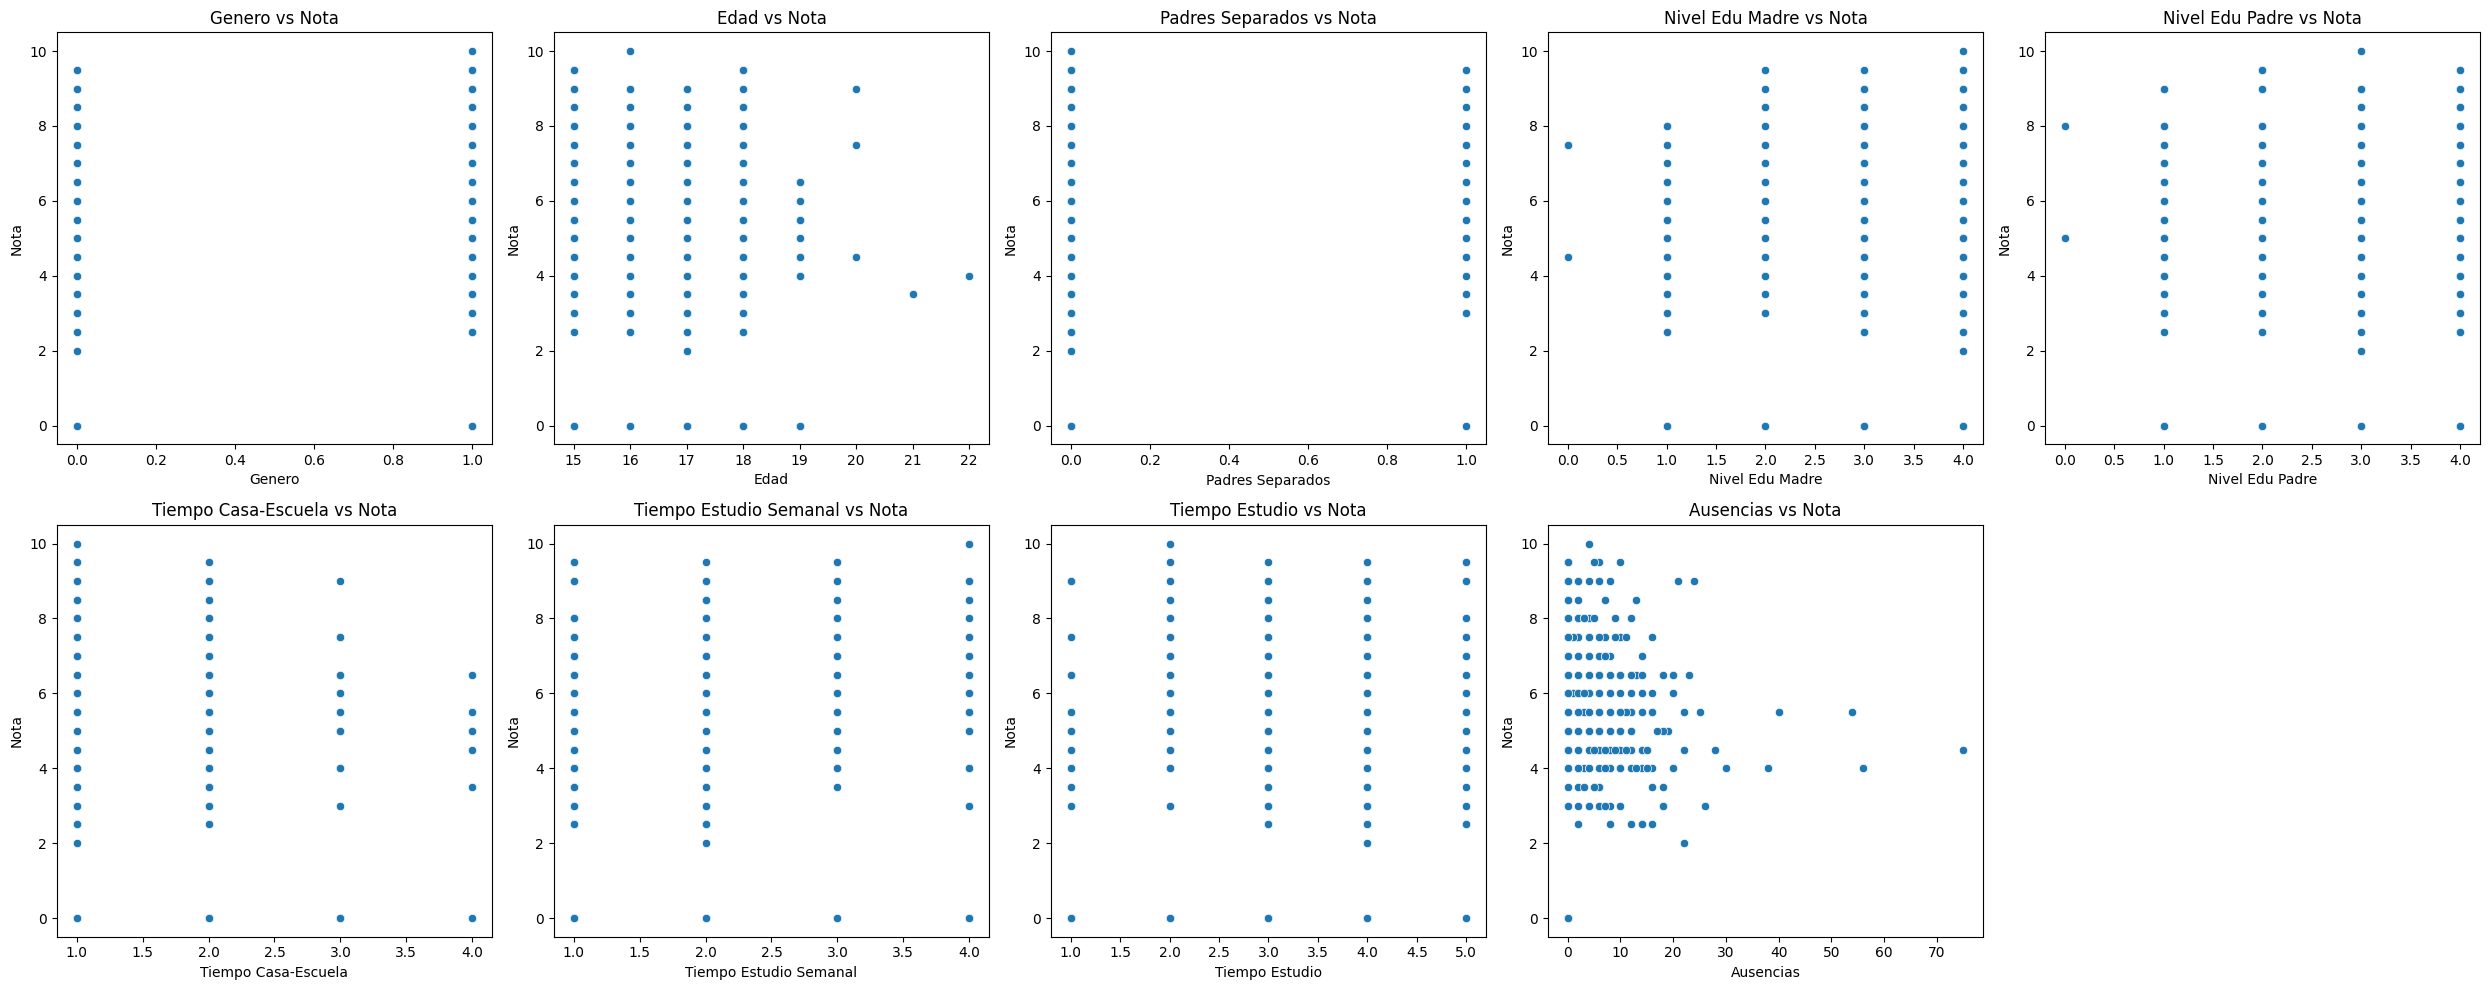

In [ ]:
# seleccion de columnas para acortar el tiempo de computo.
col = ['Nota', 'Genero', 'Edad', 'Padres Separados', 'Nivel Edu Madre', 'Nivel Edu Padre',
       'Tiempo Casa-Escuela', 'Tiempo Estudio Semanal',
       'Tiempo Estudio', 'Ausencias']

scatter_plots(df[col], 'Nota')

# 03 Construcción árbol de decisión scikit learn
Utilizando la librería [scikit learn](https://scikit-learn.org/stable/), la libería básica de referencia para machine learning, construíremos un árbol de decisión de regresión.

In [ ]:
# Siguiendo el ejemplo de las diapositivas, entrenaremos un modelo
# utilizando sólo las variables 'Nivel Edu Madre', 'Tiempo Estudio', 'Ausencias'
cols = ["Nivel Edu Madre", "Tiempo Estudio", "Ausencias"]
X = df[cols]
y = df["Nota"]

X.shape, y.shape

In [ ]:
# Características
X

,Nivel Edu Madre,Tiempo Estudio,Ausencias
0,4,3,6
1,1,3,4
2,1,3,10
3,4,2,2
4,3,3,4
...,...,...,...
390,2,5,11
391,3,4,3
392,1,5,3
393,3,4,0


In [ ]:
# Clases
y

0      3.0
1      3.0
2      5.0
3      7.5
4      5.0
      ... 
390    4.5
391    8.0
392    3.5
393    5.0
394    4.5
Name: Nota, Length: 395, dtype: float64

##0301 Importamos librerias

In [ ]:
from sklearn import tree

## 0302 Inicializamos el árbol
Definiendo las características que tendrá.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [ ]:
# Inicialización del árbol
# Solo se define su estructura y condiciones de entrenamiento

arbol = tree.DecisionTreeRegressor(max_depth=3)
arbol

DecisionTreeRegressor(max_depth=3)

# 0303 Enternamiento del modelo
Una vez inicializado y definido el árbol, el método .[fit()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.fit)

In [ ]:
# Entrenamiento

arbol = arbol.fit(X=X, y=y)
arbol

DecisionTreeRegressor(max_depth=3)

# 0304 Visualización del modelo


In [ ]:
print(tree.export_text(arbol, feature_names=list(X.columns)))

|--- Ausencias <= 0.50
|   |--- Nivel Edu Madre <= 2.50
|   |   |--- Nivel Edu Madre <= 0.50
|   |   |   |--- value: [7.50]
|   |   |--- Nivel Edu Madre >  0.50
|   |   |   |--- value: [3.01]
|   |--- Nivel Edu Madre >  2.50
|   |   |--- Tiempo Estudio <= 3.50
|   |   |   |--- value: [4.57]
|   |   |--- Tiempo Estudio >  3.50
|   |   |   |--- value: [5.66]
|--- Ausencias >  0.50
|   |--- Ausencias <= 13.50
|   |   |--- Nivel Edu Madre <= 3.50
|   |   |   |--- value: [5.52]
|   |   |--- Nivel Edu Madre >  3.50
|   |   |   |--- value: [6.26]
|   |--- Ausencias >  13.50
|   |   |--- Tiempo Estudio <= 2.50
|   |   |   |--- value: [5.77]
|   |   |--- Tiempo Estudio >  2.50
|   |   |   |--- value: [4.47]



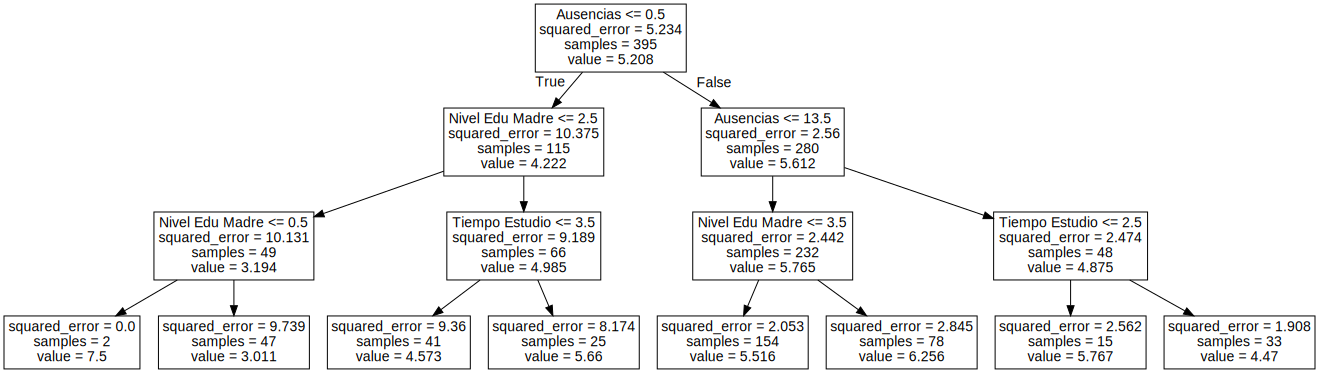

In [ ]:
import graphviz

# Export_graphviz
dot_data = tree.export_graphviz(arbol, out_file=None, feature_names=list(X.columns))
graph = graphviz.Source(dot_data)
graph

## 0305 Realizamos una predicción
Una vez el modelo está entrenado (definido) podemos pasarle datos para obtener las prediciones correspondientes de la variable objetivo.

Para esto utilizamos el método .[predict()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.predict).

In [ ]:
prediccion = arbol.predict(X)

In [ ]:
# ¿como es de buena la prediccion?
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y, prediccion, squared=True)

print(f'Error Cuadrático Medio (MSE): {mse:.2f}')

Error Cuadrático Medio (MSE): 4.27


## 0306 Volvemos a entrenar pero partiendo el dataset en train y test

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(df[cols], df["Nota"], test_size=0.1, random_state=42)

# Crear y entrenar el modelo de árbol de decisión
arbol = DecisionTreeRegressor(max_depth=20)
arbol.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = arbol.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred, squared=True)
print(f'Error Cuadrático Medio (MSE): {mse:.2f}')


Error Cuadrático Medio (MSE): 5.41


In [ ]:
def mostrar_predicciones(X_test, y_test, y_pred):

    # Asegurarse de que X_test sea un DataFrame para poder acceder a los índices y nombres de columnas
    if isinstance(X_test, pd.DataFrame):
        # Convertir X_test a un DataFrame si no lo es
        X_test = pd.DataFrame(X_test, columns=X_test.columns)
    else:
        X_test = pd.DataFrame(X_test)

    # Asegurarse de que y_test y y_pred sean Series para alinearlos correctamente
    y_test = pd.Series(y_test, name='Actual')
    y_pred = pd.Series(y_pred, name='Predicho', index=y_test.index)

    # Calcular la diferencia absoluta entre los valores predichos y los valores reales
    y_diff = (y_test - y_pred).abs()
    y_diff = pd.Series(y_diff, name='Diff', index=y_test.index)

    # Definir un umbral para considerar un acierto
    umbral = 1.5  # Este valor puede ajustarse según el contexto
    # Calcular el total de aciertos
    aciertos = (y_diff <= umbral).sum()
    print(f'Total de aciertos: {aciertos}')
    fallos = (y_diff > umbral).sum()
    print(f'Total de fallos: {fallos}')

    # Concatenar X_test, y_test y y_pred para mostrarlos juntos
    resultados = pd.concat([X_test.reset_index(drop=True), y_test.reset_index(drop=True), y_pred.reset_index(drop=True),  y_diff.reset_index(drop=True)], axis=1)
    print(resultados)

# Usar la función con los datos actuales
mostrar_predicciones(X_test, y_test, y_pred)


Total de aciertos: 22
Total de fallos: 18
    Nivel Edu Madre  Tiempo Estudio  Ausencias  Actual  Predicho      Diff
0                 2               5          2     5.0  4.000000  1.000000
1                 1               3          3     6.0  4.333333  1.666667
2                 3               3          8     2.5  5.000000  2.500000
3                 2               3          8     5.0  5.500000  0.500000
4                 2               5         11     4.5  7.500000  3.000000
5                 2               3          0     6.5  2.550000  3.950000
6                 4               3          2     9.0  6.571429  2.428571
7                 1               4         18     3.0  5.000000  2.000000
8                 2               3          0     0.0  2.550000  2.550000
9                 4               4          2     7.0  6.214286  0.785714
10                3               5          0     7.5  5.250000  2.250000
11                4               4          6     3.5  4.

#05 EJERCICIO
Entrena un árbol de regresión con todas las variables predictoras disponibles para predecir la variable 'Nota'.

Prueba con profundidades de 3, 5, 20 y compara la calidad de cada predicción con la del árbol de las celdas anteriores.

Visualiza los distintos árboles y reflexiona sobre cómo ha conseguido mejorar la capacidad predictiva a medida que aumenta la profundidad de la arquitectura.